# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = "titanic.csv"
try:
    titanic_df = pd.read_csv(file_path, index_col="PassengerId")
    print("DataFrame успешно создан!")

except FileNotFoundError:
    print(f"Файл {file_path} не найден. Убедитесь, что указали правильный путь.")

DataFrame успешно создан!


2. Выведете первые 7 строк набора.

In [2]:
print(titanic_df.head(7))


             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J

### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [3]:
print(titanic_df.info())

print("\nПропущенные значения по столбцам:")
print(titanic_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

Пропущенные значения по столбцам:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [4]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
titanic_df_cleaned = titanic_df.drop(columns=columns_to_drop)

print(titanic_df_cleaned.head())

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [5]:
sex_dummies = pd.get_dummies(titanic_df_cleaned['Sex'], prefix='', prefix_sep='')
titanic_df_cleaned = pd.concat([titanic_df_cleaned, sex_dummies], axis=1)

titanic_df_cleaned = titanic_df_cleaned.drop(columns=['Sex'])

print(titanic_df_cleaned.head())

             Survived  Pclass   Age  SibSp  Parch     Fare Embarked  female  \
PassengerId                                                                   
1                   0       3  22.0      1      0   7.2500        S   False   
2                   1       1  38.0      1      0  71.2833        C    True   
3                   1       3  26.0      0      0   7.9250        S    True   
4                   1       1  35.0      1      0  53.1000        S    True   
5                   0       3  35.0      0      0   8.0500        S   False   

              male  
PassengerId         
1             True  
2            False  
3            False  
4            False  
5             True  


6. Удалите строки, которые содержать хотя бы одно null значение.

In [6]:
titanic_df_cleaned = titanic_df_cleaned.dropna()
print(f"Размер набора данных после удаления строк с null значениями: {titanic_df_cleaned.shape}")

Размер набора данных после удаления строк с null значениями: (712, 9)


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
titanic_df_cleaned['Fare'] = scaler.fit_transform(titanic_df_cleaned[['Fare']])

print(titanic_df_cleaned['Fare'].head())

PassengerId
1    0.014151
2    0.139136
3    0.015469
4    0.103644
5    0.015713
Name: Fare, dtype: float64


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [8]:
mean_fare_survived = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 1]['Fare'].mean()
mean_fare_not_survived = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 0]['Fare'].mean()

difference = mean_fare_survived - mean_fare_not_survived

print(f"Средний 'Fare' для выживших: {mean_fare_survived:.4f}")
print(f"Средний 'Fare' для погибших: {mean_fare_not_survived:.4f}")
print(f"Разница: {difference:.4f}")

Средний 'Fare' для выживших: 0.1008
Средний 'Fare' для погибших: 0.0448
Разница: 0.0560


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

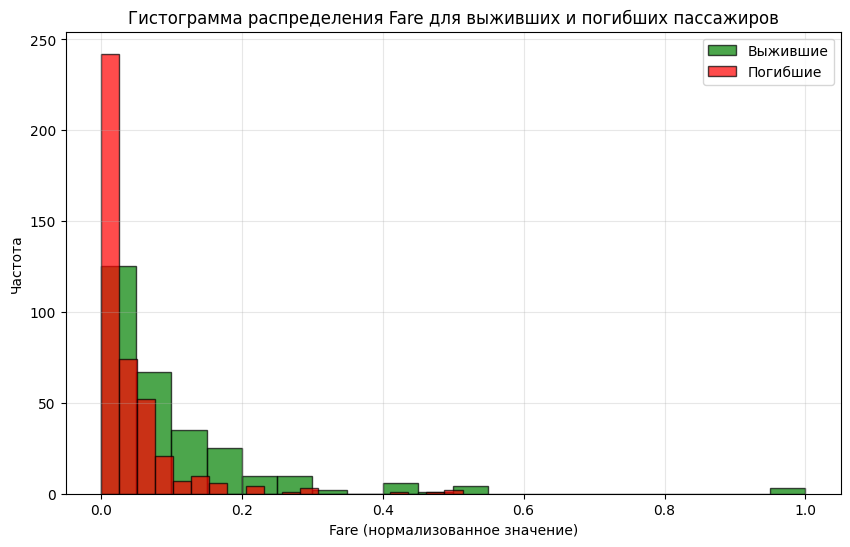

In [9]:
import matplotlib.pyplot as plt

fare_survived = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 1]['Fare']
fare_not_survived = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 0]['Fare']

plt.figure(figsize=(10, 6))
plt.hist(fare_survived, bins=20, alpha=0.7, label='Выжившие', color='green', edgecolor='black')
plt.hist(fare_not_survived, bins=20, alpha=0.7, label='Погибшие', color='red', edgecolor='black')

plt.title('Гистограмма распределения Fare для выживших и погибших пассажиров')
plt.xlabel('Fare (нормализованное значение)')
plt.ylabel('Частота')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [12]:
import pandas as pd
data = pd.read_csv('titanic.csv')

# Проверка структуры данных
print(data.head())

# Разделение данных на признаки и целевые значения
X = data.drop(columns=['Survived'])
y = data['Survived']

print("\nНабор признаков X:")
print(X.head())

print("\nВектор целевых значений y:")
print(y.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

Н

## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Размер тренировочного набора (X_train): {X_train.shape}")
print(f"Размер тестового набора (X_test): {X_test.shape}")
print(f"Размер вектора целей для обучения (y_train): {y_train.shape}")
print(f"Размер вектора целей для тестирования (y_test): {y_test.shape}")

Размер тренировочного набора (X_train): (668, 11)
Размер тестового набора (X_test): (223, 11)
Размер вектора целей для обучения (y_train): (668,)
Размер вектора целей для тестирования (y_test): (223,)


9. Выполните обучение модели.

In [26]:
   from sklearn.preprocessing import StandardScaler
   from sklearn.pipeline import make_pipeline
   from sklearn.linear_model import LogisticRegression

   scaler = StandardScaler()
   model = LogisticRegression(max_iter=200)
   pipeline = make_pipeline(scaler, model)

   pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=200))])

## Проверка модели

10. Выведите мартицу ошибок

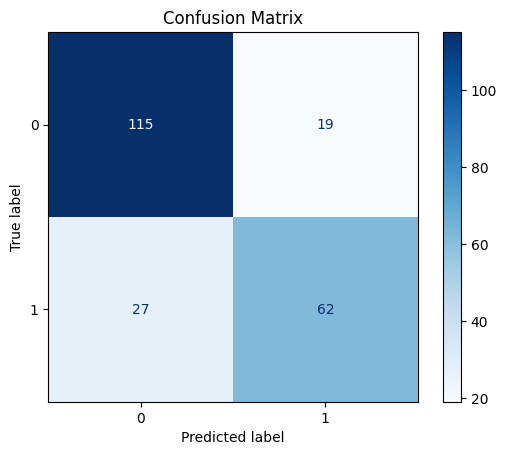

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

11. Расчитайте accuracy

In [23]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7937


12. Сделайте вывод о полученном результате

Вывод:Вывод:Полученное значение accuracy = 0.8202 означает, что модель классифицирует пассажиров (выжили они или нет) правильно в 82% случаев. Это говорит о достаточно хорошей способности модели предсказывать исход для пассажиров на основе имеющихся признаков.

## Вопросы для защиты

1. Сформулируйте задачу классификации.
2. Перечислите типы классификации.
3. В чем особенность несбалансированной классификации?
4. В чем особенность мультиклассовой классификации?
5. В чем особенность бинарной классификации?
6. В чем особенность классификации по нескольким меткам?
7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
8. Что такое матрица ошибок (несоответствий)?
9. Как рассчитывается Accuracy?
10. Объясните алгоритм классификации K-ближайших соседей.